In [1]:
import os
%pwd

'd:\\Python\\Industry level\\EndtoEnd combination\\AI-Resume-Screening-with-ML-ops\\research'

In [2]:
os.chdir('../')
%pwd

'd:\\Python\\Industry level\\EndtoEnd combination\\AI-Resume-Screening-with-ML-ops'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/AnkitSangode/JavaScriptMiniProjects/raw/refs/heads/main/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Clean and prepare text for model training

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only once, not in production)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize only once
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Resume cleaning function
def clean_resume(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)

    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply cleaning to your DataFrame
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

# Show first 2 rows
df[['Resume', 'Cleaned_Resume']].head(2)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Resume,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uit rgpv data scienti...


## Exploring the dataset by analyzing and visualizing

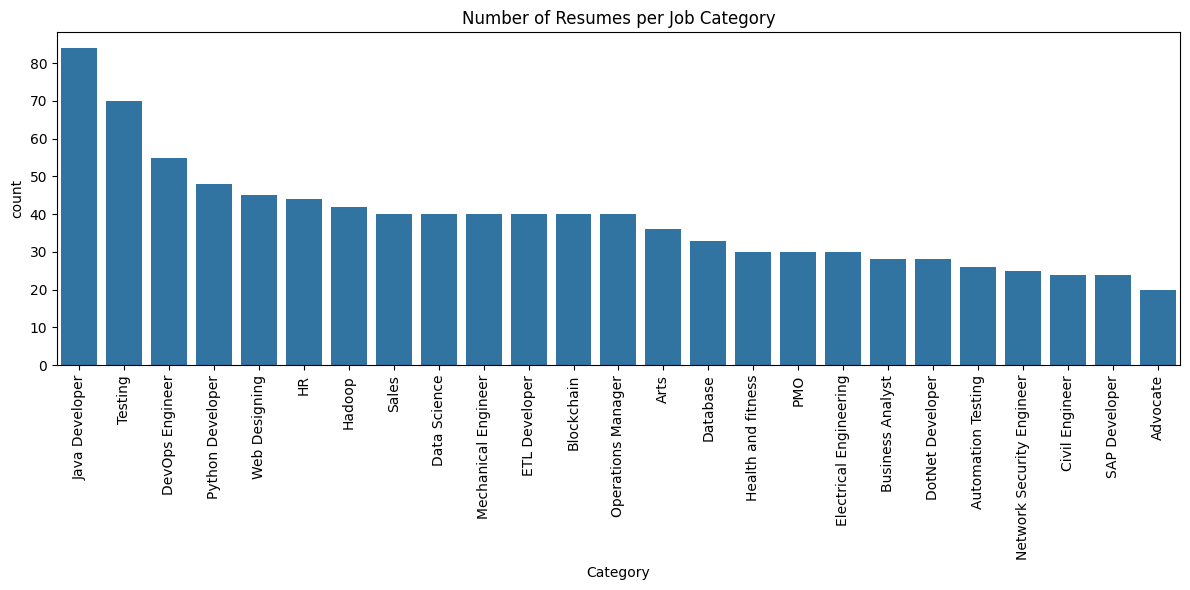

In [21]:
# 1. Number of resumes per category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Number of Resumes per Job Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

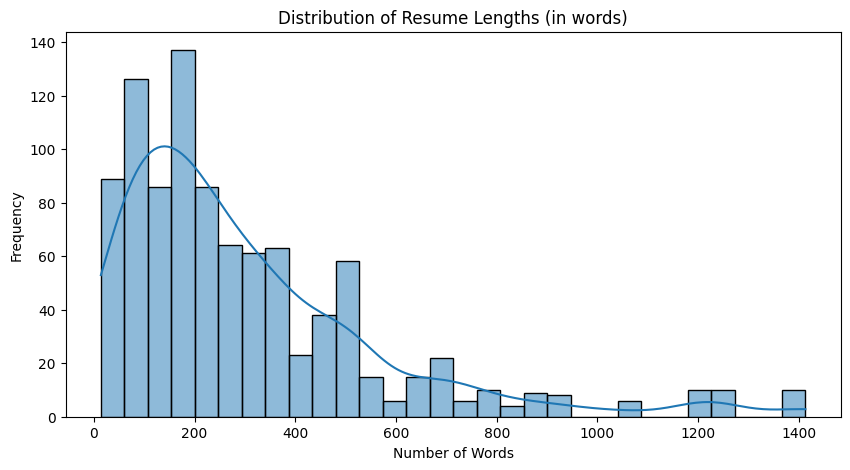

In [22]:
# 2. Distribution of resume lengths
df['Resume_Length'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['Resume_Length'], bins=30, kde=True)
plt.title('Distribution of Resume Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Note: you may need to restart the kernel to use updated packages.


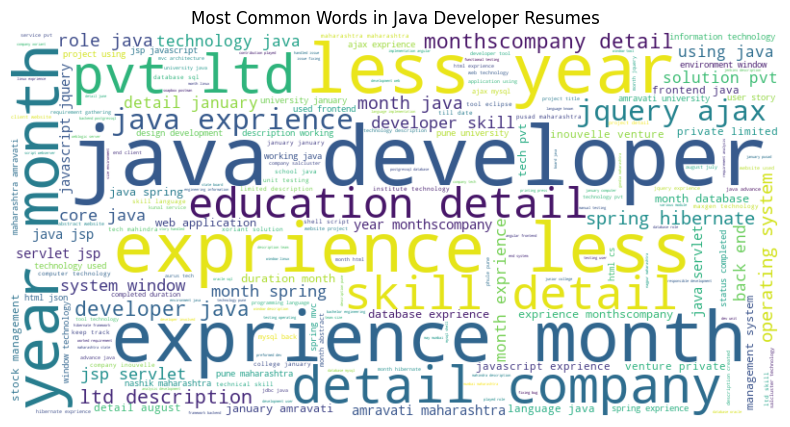

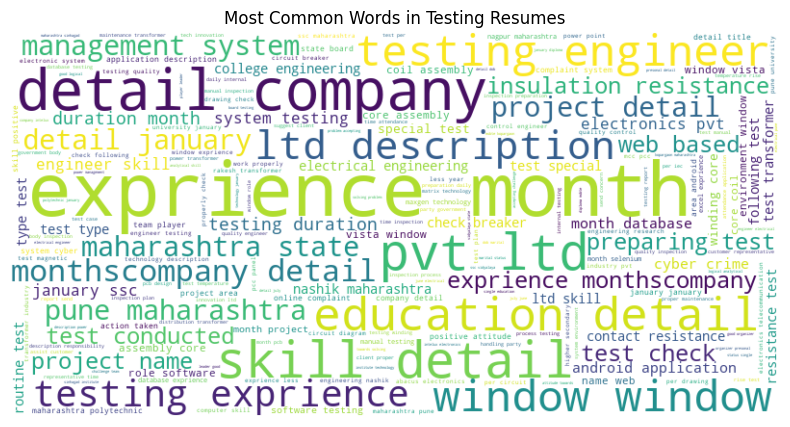

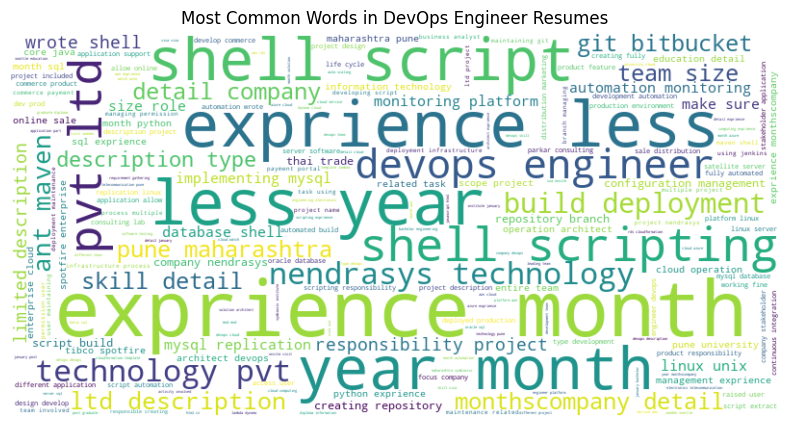

In [25]:
%pip install wordcloud

from wordcloud import WordCloud

# 3. WordCloud for top 3 categories
top_categories = df['Category'].value_counts().head(3).index
for category in top_categories:
    text = ' '.join(df[df['Category'] == category]['Cleaned_Resume'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {category} Resumes')
    plt.show()